<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Pytorch_Intro_for_Experts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [7]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [61]:
train_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor(), 
    #target_transform = Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value = 1))
)

In [63]:
test_dataset = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
  #  target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value =1))
)

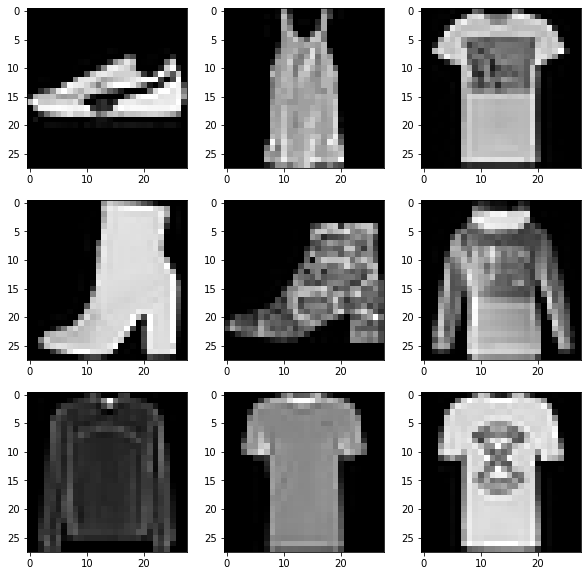

In [64]:
#Visualize the data before building the computational graph 
figure = plt.figure(figsize =(10,10))
rows,cols = 3,3
for i  in range(1,rows * cols + 1):
  simple_idx = torch.randint(len(train_dataset),size =(1,)).item()
  images,labels = train_dataset[simple_idx]
  figure.add_subplot(rows,cols,i)
  plt.imshow(images.squeeze(),cmap="gray")

In [65]:
#Build the computational graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers__relu__stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10) 
    )

  def forward(self,x):
    x = self.flatten(x)
    logits =  self.layers__relu__stack(x)
    return logits

In [66]:
#Create an instance of our model and pass it to the computational graph 
model = NeuralNetwork().to(device)

In [67]:
#Define the hyper parameters of our model
loss_fn = nn.CrossEntropyLoss()
batch_size = 64
epochs = 10 
learning_rate = 1e-3 #Equivalent to 1 * 10 - 3
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [68]:
#Define the training loop
def train_loop(dataloader,models,loss_fn,optimizer):
  size = len(dataloader.dataset)

  for batch,(X,y) in enumerate(dataloader):
    #Predictions 
    pred  = model(X)
    loss = loss_fn(pred,y)
    #Backprop 
    optimizer.zero_grad()#Reset the model's parameters 
    loss.backward() #Calculate the gradient of the loss
    #Update the weights based on the gradient of the loss
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(),batch * len(dataloader)
      print(f"loss:{loss:>7f} [{current:>5d}/{size:>5d}]")


#Define the training loop 
def test_loop(dataloader,model, loss_fn):
  size = len(dataloader.dataset)
  num_batch = len(dataloader)
  test_loss,correct = 0,0

  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred,y).item()      
      correct += (pred.argmax(1) == y).type(torch.float32).sum().item()
  
  test_loss /= num_batch 
  correct /= size

  print(f"Test Error: \n Accuracy:{(100 * correct):>0.1f}%, Avg loss {test_loss:>8f}\n")

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size = batch_size)
for t in range(epochs):
  print(f"Epoch {t + 1} ------------------>")
  train_loop(train_loader, model, loss_fn,optimizer)
  test_loop(test_loader,model, loss_fn)
  print("Done")

Epoch 1 ------------------>
loss:2.310855 [    0/60000]
loss:0.589827 [93800/60000]
loss:0.408637 [187600/60000]
loss:0.520015 [281400/60000]
loss:0.461019 [375200/60000]
loss:0.442216 [469000/60000]
loss:0.379929 [562800/60000]
loss:0.512392 [656600/60000]
loss:0.469035 [750400/60000]
loss:0.499831 [844200/60000]
Test Error: 
 Accuracy:84.3%, Avg loss 0.427624

Done
Epoch 2 ------------------>
loss:0.256608 [    0/60000]
loss:0.369092 [93800/60000]
loss:0.292233 [187600/60000]
loss:0.386658 [281400/60000]
loss:0.397896 [375200/60000]
loss:0.388339 [469000/60000]
loss:0.318972 [562800/60000]
loss:0.472133 [656600/60000]
loss:0.385889 [750400/60000]
loss:0.479815 [844200/60000]
Test Error: 
 Accuracy:85.9%, Avg loss 0.386323

Done
Epoch 3 ------------------>
loss:0.182290 [    0/60000]
loss:0.350277 [93800/60000]
loss:0.240642 [187600/60000]
loss:0.330980 [281400/60000]
loss:0.324363 [375200/60000]
loss:0.360440 [469000/60000]
loss:0.283170 [562800/60000]
loss:0.422262 [656600/60000]
lo